<a href="https://colab.research.google.com/github/JGP-Code/Challenge_Alura_Store_Colab/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [108]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



**Ingreso total por cada tienda**

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [109]:
#Impresión de todos los resultados
ingreso_total_1 = tienda['Precio'].sum()
ingreso_total_2 = tienda2['Precio'].sum()
ingreso_total_3 = tienda3['Precio'].sum()
ingreso_total_4 = tienda4['Precio'].sum()

print(f'El ingreso total de la tienda 1 es de ${ingreso_total_1:,.2f}')
print(f'El ingreso total de la tienda 2 es de ${ingreso_total_2:,.2f}')
print(f'El ingreso total de la tienda 3 es de ${ingreso_total_3:,.2f}')
print(f'El ingreso total de la tienda 4 es de ${ingreso_total_4:,.2f}')

ingresos = [ingreso_total_1, ingreso_total_2, ingreso_total_3, ingreso_total_4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

mayor_ingreso = ingresos.index(max(ingresos))
menor_ingreso = ingresos.index(min(ingresos))


print(f'La tienda con mayor ingreso es: {nombres[mayor_ingreso]} con: {ingresos[mayor_ingreso]:,.2f} \
 y la tienda con menor ingreso es: {nombres[menor_ingreso]} con: {ingresos[menor_ingreso]:,.2f}')

El ingreso total de la tienda 1 es de $1,150,880,400.00
El ingreso total de la tienda 2 es de $1,116,343,500.00
El ingreso total de la tienda 3 es de $1,098,019,600.00
El ingreso total de la tienda 4 es de $1,038,375,700.00
La tienda con mayor ingreso es: Tienda 1 con: 1,150,880,400.00  y la tienda con menor ingreso es: Tienda 4 con: 1,038,375,700.00


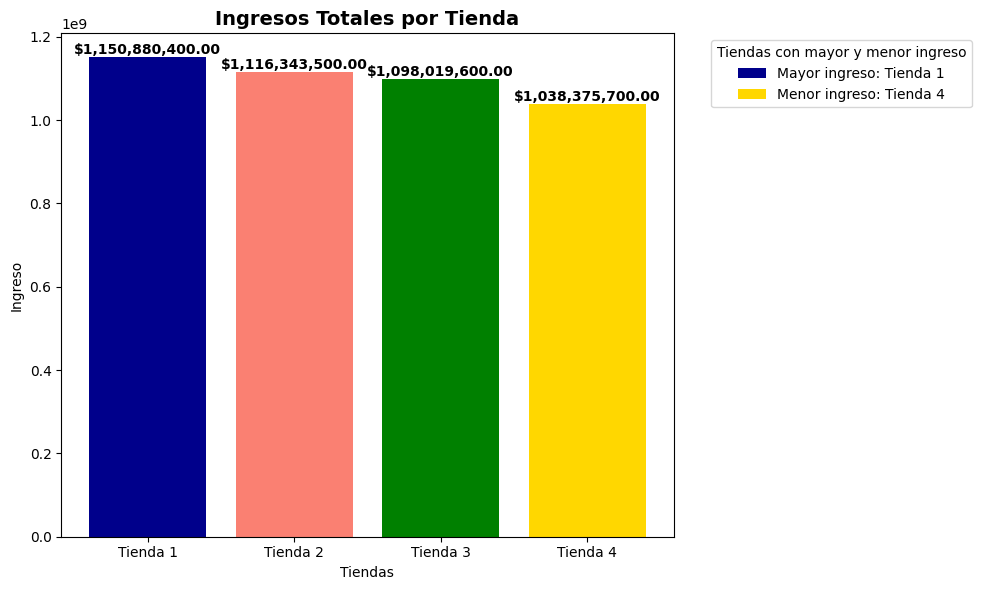

In [110]:
#Creación del gráfico para el ingreso total de las tiendas
import matplotlib.pyplot as plt

# Asignar color por tienda

colores = ['darkblue', 'salmon', 'green', 'gold']

# Estilo del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear barras con etiquetas solo para mayor y menor ingreso
barras = []
for i, (nombre, ingreso, color) in enumerate(zip(nombres, ingresos, colores)):
    if i == mayor_ingreso:
        barra = ax.bar(nombre, ingreso, color=color, label=f"Mayor ingreso: {nombre}")
    elif i == menor_ingreso:
        barra = ax.bar(nombre, ingreso, color=color, label=f"Menor ingreso: {nombre}")
    else:
        barra = ax.bar(nombre, ingreso, color=color)
    barras.append(barra)


# Crear barras
barras = ax.bar(nombres, ingresos, color=colores)

# Etiquetas sobre cada barra
for barra, ingreso in zip(barras, ingresos):
    ax.text(barra.get_x() + barra.get_width() / 2,
            barra.get_height(),
            f"${ingreso:,.2f}",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Colocar la leyenda fuera del gráfico a la derecha
plt.legend(title="Tiendas con mayor y menor ingreso", bbox_to_anchor=(1.05, 1), loc='upper left')

# Título y etiquetas
ax.set_title('Ingresos Totales por Tienda', fontsize=14, fontweight='bold')
ax.set_ylabel('Ingreso')
ax.set_xlabel('Tiendas')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [111]:
mas_vend_t1 = tienda.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False)
mas_vend_t1

,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [112]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [113]:
mas_vend_t2 = tienda2.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False)
mas_vend_t2

,Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [114]:
tienda2['Categoría del Producto'].unique()

array(['Muebles', 'Instrumentos musicales', 'Deportes y diversión',
       'Electrónicos', 'Artículos para el hogar', 'Juguetes',
       'Electrodomésticos', 'Libros'], dtype=object)

In [115]:
mas_vend_t3 = tienda3.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False)
mas_vend_t3

,Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [116]:
tienda3['Categoría del Producto'].unique()

array(['Electrodomésticos', 'Muebles', 'Instrumentos musicales',
       'Deportes y diversión', 'Electrónicos', 'Juguetes',
       'Artículos para el hogar', 'Libros'], dtype=object)

In [122]:
mas_vend_t4 = tienda4.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False)
mas_vend_t4

,Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [118]:
tienda4['Categoría del Producto'].unique()

array(['Electrodomésticos', 'Muebles', 'Deportes y diversión', 'Libros',
       'Electrónicos', 'Instrumentos musicales', 'Juguetes',
       'Artículos para el hogar'], dtype=object)

In [123]:
# Asegúrate de que cada DataFrame tenga columnas bien definidas
mas_vend_t1 = mas_vend_t1.reset_index()
mas_vend_t2 = mas_vend_t2.reset_index()
mas_vend_t3 = mas_vend_t3.reset_index()
mas_vend_t4 = mas_vend_t4.reset_index()

mas_vend_t1['Tienda'] = 'Tienda 1'
mas_vend_t2['Tienda'] = 'Tienda 2'
mas_vend_t3['Tienda'] = 'Tienda 3'
mas_vend_t4['Tienda'] = 'Tienda 4'

cat_mas_ventas = pd.concat([
    mas_vend_t1.head(3),
    mas_vend_t2.head(3),
    mas_vend_t3.head(3),
    mas_vend_t4.head(3)
])
cat_mas_ventas


,Categoría del Producto,Producto,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
0,Muebles,442,Tienda 2
1,Electrónicos,422,Tienda 2
2,Juguetes,313,Tienda 2
0,Muebles,499,Tienda 3
1,Electrónicos,451,Tienda 3
2,Juguetes,315,Tienda 3
0,Muebles,480,Tienda 4


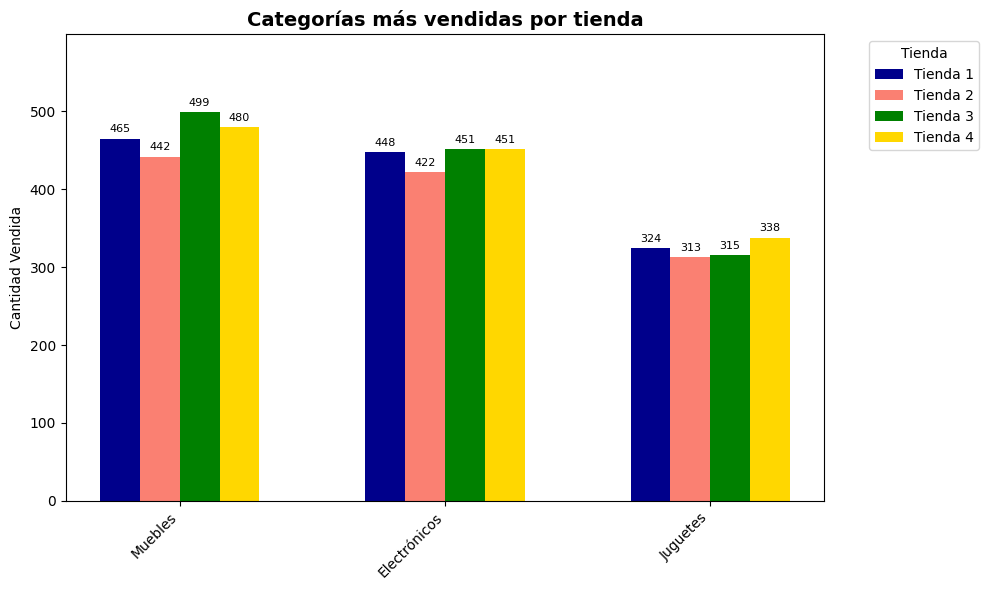

In [140]:
#Gráfico para más ventas por categoria en todas las tiendas
import matplotlib.pyplot as plt
import numpy as np

# Extraemos las categorías únicas en el orden que aparecen
categorias = cat_mas_ventas['Categoría del Producto'].unique()
x = np.arange(len(categorias))  # posiciones base para cada categoría

colores = ['darkblue', 'salmon', 'green', 'gold']

width = 0.15  # ancho de cada barra

fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar una barra por tienda usando la lista 'nombres'
for i, tienda in enumerate(nombres):
    offset = width * i
    # Filtrar datos por tienda
    datos_tienda = cat_mas_ventas[cat_mas_ventas['Tienda'] == tienda]
    # Alinear cantidades con el orden de categorías
    cantidades = [datos_tienda[datos_tienda['Categoría del Producto'] == cat]['Producto'].sum() for cat in categorias]
    rects = ax.bar(x + offset, cantidades, width, label=tienda, color=colores[i])

# Añadir etiquetas
    ax.bar_label(rects, padding=3, fontsize=8)



# Etiquetas y formato
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Categorías más vendidas por tienda', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(nombres) - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, cat_mas_ventas['Producto'].max() * 1.2)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [147]:
'''calf_prom_t1 = round(tienda['Calificación'].mean(),2)
calf_prom_t2 = round(tienda2['Calificación'].mean(),2)
calf_prom_t3 = round(tienda3['Calificación'].mean(),2)
calf_prom_t4 = round(tienda4['Calificación'].mean(),2)

print(f'La calificación promedio de la tienda 1 es de: {calf_prom_t1}')
print(f'La calificación promedio de la tienda 2 es de: {calf_prom_t2}')
print(f'La calificación promedio de la tienda 3 es de: {calf_prom_t3}')
print(f'La calificación promedio de la tienda 4 es de: {calf_prom_t4}')'''
print(type(tienda))


<class 'str'>


# 4. Productos más y menos vendidos

Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [148]:
prod_vendido_t1 = tienda['Producto'].value_counts().reset_index()
prod_vendido_t1['Tienda'] = 'Tienda 1'
prod_vendido_t1.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t1 = prod_vendido_t1.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t1 = prod_vendido_t1.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t1 = pd.concat([mas_vend_t1, men_vend_t1])
resul_mas_men_vendido_t1

TypeError: string indices must be integers, not 'str'

In [ ]:
prod_vendido_t2 = tienda2['Producto'].value_counts().reset_index()
prod_vendido_t2['Tienda'] = 'Tienda 2'
prod_vendido_t2.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t2 = prod_vendido_t2.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t2 = prod_vendido_t2.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t2 = pd.concat([mas_vend_t2, men_vend_t2])
resul_mas_men_vendido_t2

In [ ]:
prod_vendido_t3 = tienda3['Producto'].value_counts().reset_index()
prod_vendido_t3['Tienda'] = 'Tienda 3'
prod_vendido_t3.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t3 = prod_vendido_t3.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t3 = prod_vendido_t3.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t3 = pd.concat([mas_vend_t3, men_vend_t3])
resul_mas_men_vendido_t3

In [ ]:
prod_vendido_t4 = tienda4['Producto'].value_counts().reset_index()
prod_vendido_t4['Tienda'] = 'Tienda 4'
prod_vendido_t4.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t4 = prod_vendido_t4.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t4 = prod_vendido_t4.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t4 = pd.concat([mas_vend_t4, men_vend_t4])
resul_mas_men_vendido_t4

In [ ]:
#Creación del gráfico para los 3 más vendidos de cada tienda.
resul_mas_vendido_tiendas = pd.concat([mas_vend_t1, mas_vend_t2, mas_vend_t3, mas_vend_t4])
mas_men_vendido_total = pd.concat([resul_mas_vendido_tiendas,resul_men_vendido_tiendas])

import matplotlib.pyplot as plt
import numpy as np

# Asignar color por tienda
colores = {
    'Tienda 1': 'darkblue',
    'Tienda 2': 'salmon',
    'Tienda 3': 'green',
    'Tienda 4': 'gold'
}
# Crear etiquetas combinadas: Producto (Tienda X)
resul_mas_vendido_tiendas['Etiqueta'] = (
    resul_mas_vendido_tiendas['Producto'] + ' (' +  resul_mas_vendido_tiendas['Tienda'].astype(str) + ')'
)

# Asignar color según tienda
resul_mas_vendido_tiendas['Color'] = resul_mas_vendido_tiendas['Tienda'].astype(str).map(colores)

# Crear figura
plt.figure(figsize=(10,4))

# Graficar barras horizontales
plt.barh(
    resul_mas_vendido_tiendas['Etiqueta'],
    resul_mas_vendido_tiendas['Cantidad Vendida'],
    color=resul_mas_vendido_tiendas['Color']
)


# Títulos y etiquetas
plt.title('3 Productos Más Vendidos en cada tienda', fontsize=14)
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.ylabel('Producto', fontsize=12)

# Opcional: invertir el eje para que el más vendido esté arriba
plt.gca().invert_yaxis()

# Mostrar gráfico
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
#Creación del gráfico para los 3 menos vendidos de cada tienda.
resul_men_vendido_tiendas = pd.concat([men_vend_t1, men_vend_t2, men_vend_t3, men_vend_t4])
mas_men_vendido_total = pd.concat([resul_mas_vendido_tiendas,resul_men_vendido_tiendas])

import matplotlib.pyplot as plt
import numpy as np

# Asignar color por tienda
colores = {
    'Tienda 1': 'darkblue',
    'Tienda 2': 'salmon',
    'Tienda 3': 'green',
    'Tienda 4': 'gold'
}
# Crear etiquetas combinadas: Producto (Tienda X)
resul_men_vendido_tiendas['Etiqueta'] = (
    resul_men_vendido_tiendas['Producto'] + ' (' +  resul_men_vendido_tiendas['Tienda'].astype(str) + ')'
)

# Asignar color según tienda
resul_men_vendido_tiendas['Color'] = resul_men_vendido_tiendas['Tienda'].astype(str).map(colores)

# Crear figura
plt.figure(figsize=(10,4))

# Graficar barras horizontales
plt.barh(
    resul_men_vendido_tiendas['Etiqueta'],
    resul_men_vendido_tiendas['Cantidad Vendida'],
    color=resul_men_vendido_tiendas['Color']
)


# Títulos y etiquetas
plt.title('3 Productos Menos Vendidos en cada tienda', fontsize=14)
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.ylabel('Producto', fontsize=12)

# Opcional: invertir el eje para que el más vendido esté arriba
plt.gca().invert_yaxis()

# Mostrar gráfico
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# 5. Envío promedio por tienda

Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [ ]:
cost_env_t1 = round(tienda['Costo de envío'].mean())
cost_env_t2 = round(tienda2['Costo de envío'].mean())
cost_env_t3 = round(tienda3['Costo de envío'].mean())
cost_env_t4 = round(tienda4['Costo de envío'].mean())

print(f'El costo de envío promedio de la tienda 1 es de: $ {cost_env_t1:,.2f}')
print(f'El costo de envío promedio de la tienda 2 es de: $ {cost_env_t2:,.2f}')
print(f'El costo de envío promedio de la tienda 3 es de: $ {cost_env_t3:,.2f}')
print(f'El costo de envío promedio de la tienda 4 es de: $ {cost_env_t4:,.2f}')